# **Course Project Chapter 3 - Warm up**
_David da Paz (April 2018)_
___
1. Task 1

2. Task 2

3. Task 3


# Task 1

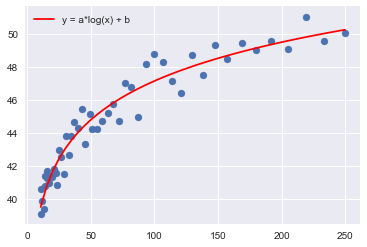

a: 3.3902409977137995
b: 31.52920121929614


In [65]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

data_df = pd.read_csv('task-1.csv')

x = data_df.x.values
y = data_df.y.values

coefs = np.polyfit(np.log(x),y, deg=1)
a,b = coefs

x_values = np.linspace(x.min(), x.max(), num=50)
y_values = np.polyval(coefs, np.log(x_values))

sns.set()

plt.scatter(x, y, label=None)
plt.plot(x_values, y_values, label='y = a*log(x) + b', color='red')
plt.legend()
plt.show()

print('a:', a)
print('b:', b)

In [66]:
# Define RSS measure
def RSS(y, y_pred):
    return np.sum(np.square(y - y_pred))

# RSS of the baseline
rss_baseline = RSS(y, y.mean())
print('RSS baseline:', rss_baseline)



from scipy.linalg import lstsq

# Fit a multiple linear regression
X1 = np.c_[np.ones(x_values.shape[0]), x_values]
w, rss_model, _, _ = lstsq(X1, y)
print('RSS model:', rss_model) 



# R^2 coefficient
R2 = 1 - (rss_model / rss_baseline)
print('R^2 coefficient:', R2)

RSS baseline: 541.1432872199999
RSS model: 31.50688047692675
R^2 coefficient: 0.9417771942828929


Explain how the polyfit() function finds the optimal parameters. (1-2 sentences)

Give two differences between this method and the gradient descent one. Write a short sentence for each one.


# Task 2

In [67]:
data_df = pd.read_csv('task-2.csv')

from sklearn.model_selection import train_test_split

# Split into train/test sets
train_df, test_df = train_test_split(
    data_df, train_size=0.8, test_size=0.2, random_state=0)

print('Train DataFrame:', train_df.shape)
print('Test DataFrame:', test_df.shape)

Train DataFrame: (800, 4)
Test DataFrame: (200, 4)


In [68]:
# Create X/y variables
X_tr = train_df.drop('y', axis=1).values
y_tr = train_df.y.values

X_te = test_df.drop('y', axis=1).values
y_te = test_df.y.values


# Mean absolute error (MAE)
def MAE(y, y_pred):
    return np.mean(np.abs(y - y_pred))


from sklearn.linear_model import LinearRegression

# Create a linear regression
lr = LinearRegression()

# Fit it to train data
lr.fit(X_tr, y_tr)

# Print coefficients
print('Coefficients:', lr.coef_)

print('Intercept:', lr.intercept_)

# Compute predictions
y_pred = lr.predict(X_te)

# Mean baseline
mae_baseline = MAE(y_te, np.mean(y_te))

# Linear regression
mae_lr = MAE(y_te, y_pred)

print('MAE baseline: {:.3f}'.format(mae_baseline))
print('MAE linear regression: {:.3f}'.format(mae_lr))

Coefficients: [ 3.18946219  0.72611244 -0.29586984]
Intercept: 1982.1964160299176
MAE baseline: 115.829
MAE linear regression: 104.788


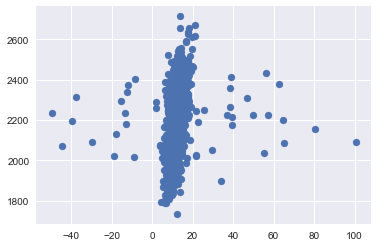

In [69]:
plt.scatter(train_df.x1.values, train_df.y.values, label=None)
plt.show()

In [70]:
# dropping outliers
train_df2 = train_df.drop(train_df[(train_df['x1'] > 25) | (train_df['x1'] < 0)].index)

In [71]:
# model without outliers

X_tr2 = train_df2.drop('y', axis=1).values
y_tr2 = train_df2.y.values

# Create a linear regression
lr2 = LinearRegression()

# Fit it to train data
lr2.fit(X_tr2, y_tr2)

# Print coefficients
print('Coefficients:', lr2.coef_)

print('Intercept:', lr2.intercept_)

# Compute predictions
y_pred2 = lr2.predict(X_te)

# Linear regression
mae_lr2 = MAE(y_te, y_pred2)

print('MAE linear regression without outliers: {:.3f}'.format(mae_lr2))

Coefficients: [24.59753374  1.40452556 -0.99774536]
Intercept: 1617.0985349148918
MAE linear regression without outliers: 95.293


In [72]:
from sklearn.linear_model import HuberRegressor

huber = HuberRegressor(epsilon=1.1) # Create object
huber.fit(X_tr, y_tr) # Fit it to train data
y_pred_huber = huber.predict(X_te) # Predictions for test data points
mae_huber = MAE(y_te, y_pred_huber) # MAE of predictions
print('MAE Huber: {:.3f}'.format(mae_huber))

MAE Huber: 76.643


# Task 3

Shape: (50, 10)
Features: ['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']
Train set: (25, 10) (25,)
Test set: (25, 10) (25,)


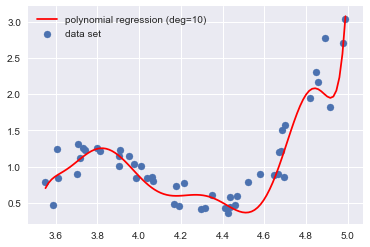

In [73]:
data_df = pd.read_csv('task-3.csv')

# Extract x, y data
x = data_df.x.values
y = data_df.y.values

from sklearn.preprocessing import PolynomialFeatures

# Create the polynomial features
poly_obj = PolynomialFeatures(degree=10, include_bias=False)
X_poly = poly_obj.fit_transform(x[:, np.newaxis])

print('Shape:', X_poly.shape) # (50, 10)
print('Features:', poly_obj.get_feature_names())

from sklearn.model_selection import train_test_split

# Split into train/test sets
X_tr, X_te, y_tr, y_te = train_test_split(
    X_poly, y, test_size=25, random_state=0)

print('Train set:', X_tr.shape, y_tr.shape) # (25, 10) (25,)
print('Test set:', X_te.shape, y_te.shape) # (25, 10) (25,)

# Linear regression
lr = LinearRegression()
lr.fit(X_tr, y_tr)

# Plot the model
x_values = np.linspace(min(x), max(x), num=100)
x_values_poly = poly_obj.transform(x_values[:, np.newaxis])
y_values_lr = lr.predict(x_values_poly)

plt.scatter(x, y, label='data set')
plt.plot(x_values, y_values_lr, color='red', label='polynomial regression (deg=10)')
plt.legend()
plt.show()



In [74]:
from sklearn.metrics import mean_squared_error as mse

# Train score
y_pred = lr.predict(X_tr)
print('Train MSE: {:.2f}'.format(mse(y_tr, y_pred)))

# Test score
y_pred = lr.predict(X_te)
print('Test MSE: {:.2f}'.format(mse(y_te, y_pred)))

Train MSE: 0.03
Test MSE: 0.06


In [75]:
# RSS of predictions
RSS_tr = np.sum(np.square(y_tr - y_pred))
RSS_te = np.sum(np.square(y_te - y_pred))

print('RSS train:', RSS_tr)
print('RSS test:', RSS_te)

RSS train: 18.740051334795044
RSS test: 1.5136825572383905


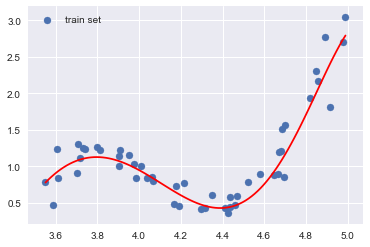

In [76]:
from sklearn.linear_model import Ridge

# Ridge regression
ridge = Ridge()
ridge.fit(X_tr, y_tr)

# Plot the model
y_values_ridge = ridge.predict(x_values_poly)

plt.scatter(x, y, label='train set')
plt.plot(x_values, y_values_ridge, color='red')
plt.legend()
plt.show()

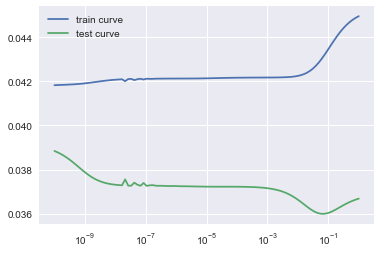

In [77]:
# Define a set of alpha values
alphas = np.logspace(-10, 0, num=100)

# Save train/test scores
train_scores = []
test_scores = []

# Grid search
for alpha in alphas:
    # Ridge regression
    ridge = Ridge(alpha)
    ridge.fit(X_tr, y_tr)
    
    # Train score
    y_pred = ridge.predict(X_tr)
    train_scores.append(mse(y_tr, y_pred))
    
    # Test score
    y_pred = ridge.predict(X_te)
    test_scores.append(mse(y_te, y_pred))
    
# Plot validation curves
plt.semilogx(alphas, train_scores, label='train curve')
plt.semilogx(alphas, test_scores, label='test curve')
plt.legend()
plt.show()

In [78]:
# Find best alpha
idx = np.argmin(test_scores)
best_alpha = alphas[idx]
print('Best alpha {:.1e}'.format(best_alpha))

# Print train/test scores
print('Ridge regression 2 - MSE train: {:,.0f} test: {:,.0f}'.format(
    train_scores[idx],
    test_scores[idx]
))

Best alpha 6.1e-02
Ridge regression 2 - MSE train: 0 test: 0


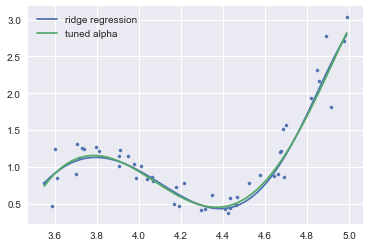

In [79]:
# Ridge regression with tuned alpha
ridge2 = Ridge(best_alpha)
ridge2.fit(X_tr, y_tr)

# Plot model
y_values_ridge2 = ridge2.predict(x_values_poly)

plt.scatter(x, y, s=10)
plt.plot(x_values, y_values_ridge, label='ridge regression')
plt.plot(x_values, y_values_ridge2, label='tuned alpha')
plt.legend()
plt.show()